In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from datetime import datetime

In [3]:
%matplotlib inline


In [4]:
sns.set(style="whitegrid")
plt.rcParams['figure.autolayout'] = True

In [5]:
# Data Loading and Preprocessing

# File paths
ev_maker_path = '../data/raw/India-EV-Market/EV Maker by Place.csv'
ev_cat_path = '../data/raw/India-EV-Market/ev_cat_01-24.csv'
ev_sales_path = '../data/raw/India-EV-Market/ev_sales_by_makers_and_cat_15-24.csv'
operational_pc_path = '../data/raw/India-EV-Market/OperationalPC.csv'
vehicle_class_path = '../data/raw/India-EV-Market/Vehicle Class - All.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB
None


,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


C:\Users\LOQ\AppData\Local\Temp\ipykernel_28616\2235064494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


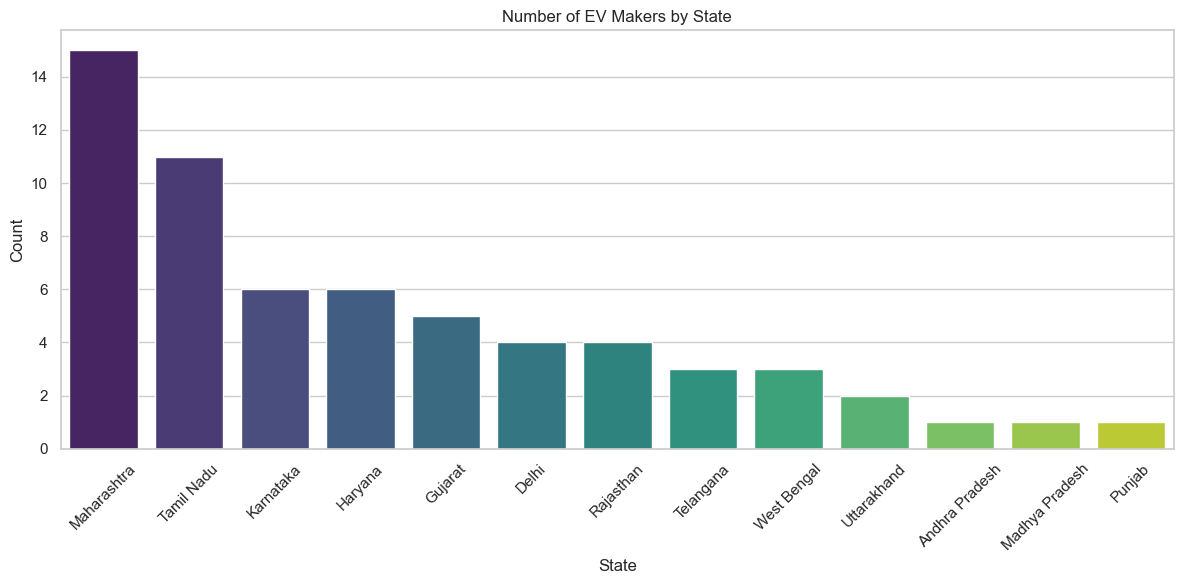

In [6]:
# EV maker by place
ev_maker = pd.read_csv(ev_maker_path)
print(ev_maker.info())
display(ev_maker.head())

plt.figure(figsize=(12, 6))
state_counts = ev_maker['State'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of EV Makers by State')
plt.ylabel('Count')
plt.xlabel('State')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             283 non-null    datetime64[ns]
 1   FOUR WHEELER (INVALID CARRIAGE)  284 non-null    int64         
 2   HEAVY GOODS VEHICLE              284 non-null    int64         
 3   HEAVY MOTOR VEHICLE              284 non-null    int64         
 4   HEAVY PASSENGER VEHICLE          284 non-null    int64         
 5   LIGHT GOODS VEHICLE              284 non-null    int64         
 6   LIGHT MOTOR VEHICLE              284 non-null    int64         
 7   LIGHT PASSENGER VEHICLE          284 non-null    int64         
 8   MEDIUM GOODS VEHICLE             284 non-null    int64         
 9   MEDIUM PASSENGER VEHICLE         284 non-null    int64         
 10  MEDIUM MOTOR VEHICLE             284 non-null    int64        

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28616\2595653146.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ev_cat['Date'] = pd.to_datetime(ev_cat['Date'], errors='coerce', dayfirst=True)


,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2001-01-01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,2002-01-01,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,2003-01-01,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,2004-01-01,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0


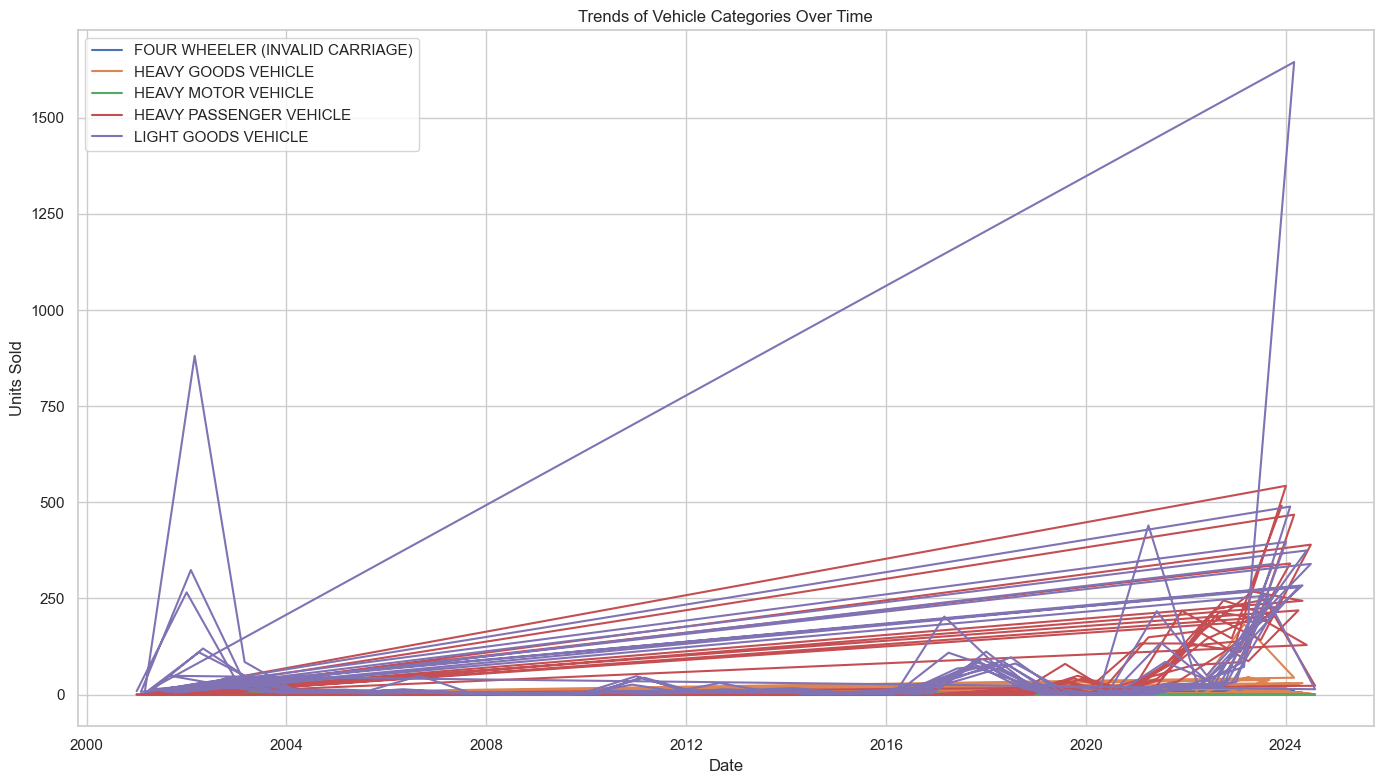

In [8]:
# EV catogory trends
ev_cat = pd.read_csv(ev_cat_path)
ev_cat['Date'] = pd.to_datetime(ev_cat['Date'], errors='coerce', dayfirst=True)
for col in ev_cat.columns[1:]:
    if ev_cat[col].dtype == 'object':
        ev_cat[col] = pd.to_numeric(ev_cat[col].str.replace(',', ''), errors='coerce')
    else:
        ev_cat[col] = pd.to_numeric(ev_cat[col], errors='coerce')

print(ev_cat.info())
display(ev_cat.head())

plt.figure(figsize=(14, 8))
for col in ev_cat.columns[1:6]:
    plt.plot(ev_cat['Date'], ev_cat[col], label=col)
plt.title('Trends of Vehicle Categories Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cat          1386 non-null   object
 1   Maker        1386 non-null   object
 2   2015         1386 non-null   int64 
 3   2016         1386 non-null   int64 
 4   2017         1386 non-null   int64 
 5   2018         1386 non-null   int64 
 6   2019         1386 non-null   int64 
 7   2020         1386 non-null   int64 
 8   2021         1386 non-null   int64 
 9   2022         1386 non-null   int64 
 10  2023         1386 non-null   int64 
 11  2024         1386 non-null   int64 
 12  Total Sales  1386 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 140.9+ KB
None


,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total Sales
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0,43
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51,1098
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0,1
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0,2
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578,1069


Cat            0
Maker          0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
2022           0
2023           0
2024           0
Total Sales    0
dtype: int64


C:\Users\LOQ\AppData\Local\Temp\ipykernel_28616\3249426839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makers.values, y=top_makers.index, palette='magma')


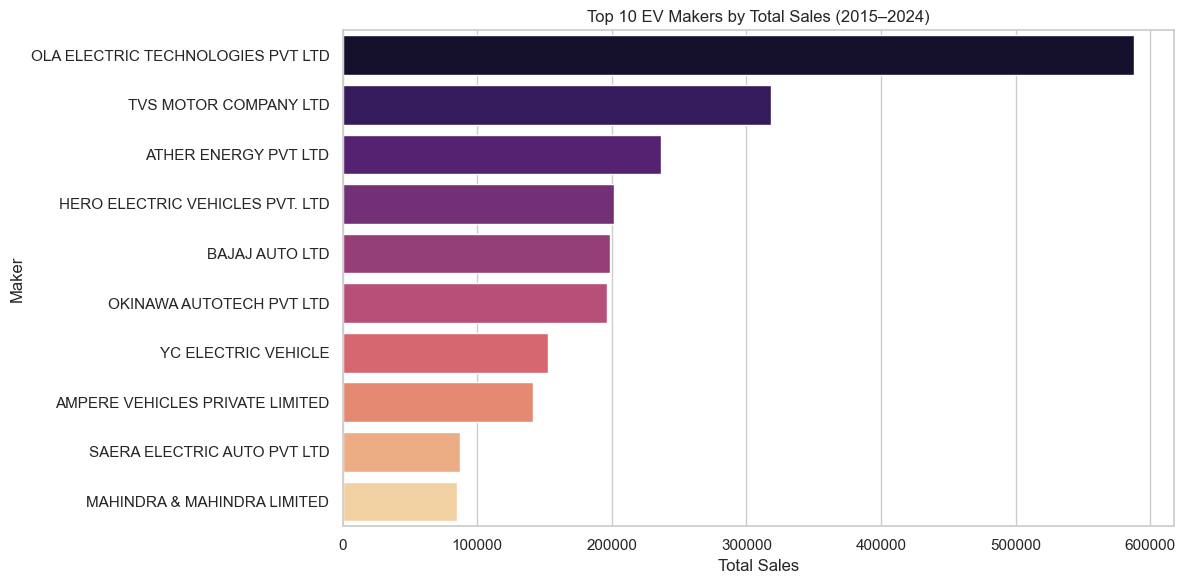

In [15]:
# EV sales by maker and catogory
ev_sales = pd.read_csv(ev_sales_path)
ev_sales.iloc[:, 2:] = ev_sales.iloc[:, 2:].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
ev_sales['Total Sales'] = ev_sales.loc[:, '2015':'2024'].sum(axis=1)
top_makers = ev_sales.groupby('Maker')['Total Sales'].sum().sort_values(ascending=False).head(10)

print(ev_sales.info())
display(ev_sales.head())
print(ev_sales.isnull().sum())

plt.figure(figsize=(12, 6))
sns.barplot(x=top_makers.values, y=top_makers.index, palette='magma')
plt.title('Top 10 EV Makers by Total Sales (2015–2024)')
plt.xlabel('Total Sales')
plt.ylabel('Maker')
plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   State                   34 non-null     object
 1   No. of Operational PCS  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes
None


,State,No. of Operational PCS
0,Andaman & Nicobar,3
1,Andhra Pradesh,327
2,Arunachal Pradesh,9
3,Assam,86
4,Bihar,124


State                     0
No. of Operational PCS    0
dtype: int64


C:\Users\LOQ\AppData\Local\Temp\ipykernel_28616\180870134.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=operational_pc['State'], y=operational_pc['No. of Operational PCS'], palette='coolwarm')


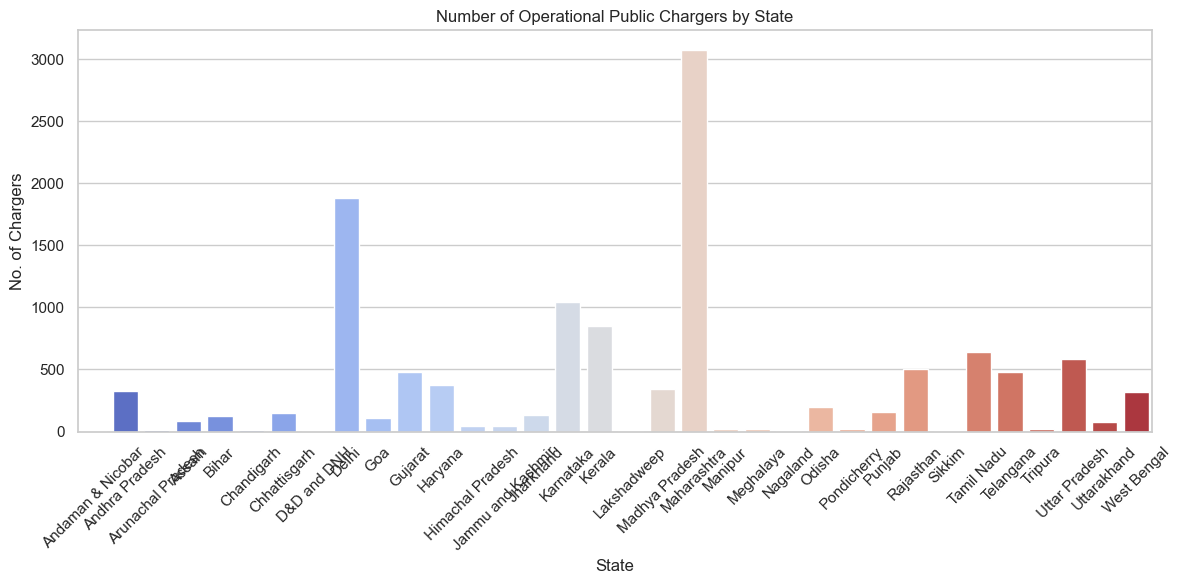

In [14]:
# operational charging stations
operational_pc = pd.read_csv(operational_pc_path)
operational_pc['No. of Operational PCS'] = pd.to_numeric(
    operational_pc['No. of Operational PCS'].astype(str).str.replace(',', ''), errors='coerce')


print(operational_pc.info())
display(operational_pc.head())
print(operational_pc.isnull().sum())

plt.figure(figsize=(12, 6))
sns.barplot(x=operational_pc['State'], y=operational_pc['No. of Operational PCS'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Number of Operational Public Chargers by State')
plt.ylabel('No. of Chargers')
plt.xlabel('State')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle Class       16 non-null     object
 1   Total Registration  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes
None


,Vehicle Class,Total Registration
0,FOUR WHEELER (INVALID CARRIAGE),21346
1,HEAVY GOODS VEHICLE,5870865
2,HEAVY MOTOR VEHICLE,102965
3,HEAVY PASSENGER VEHICLE,828189
4,LIGHT GOODS VEHICLE,10249591


Vehicle Class         0
Total Registration    0
dtype: int64


C:\Users\LOQ\AppData\Local\Temp\ipykernel_28616\3984034959.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_class['Vehicle Class'], y=vehicle_class['Total Registration'], palette='cubehelix')


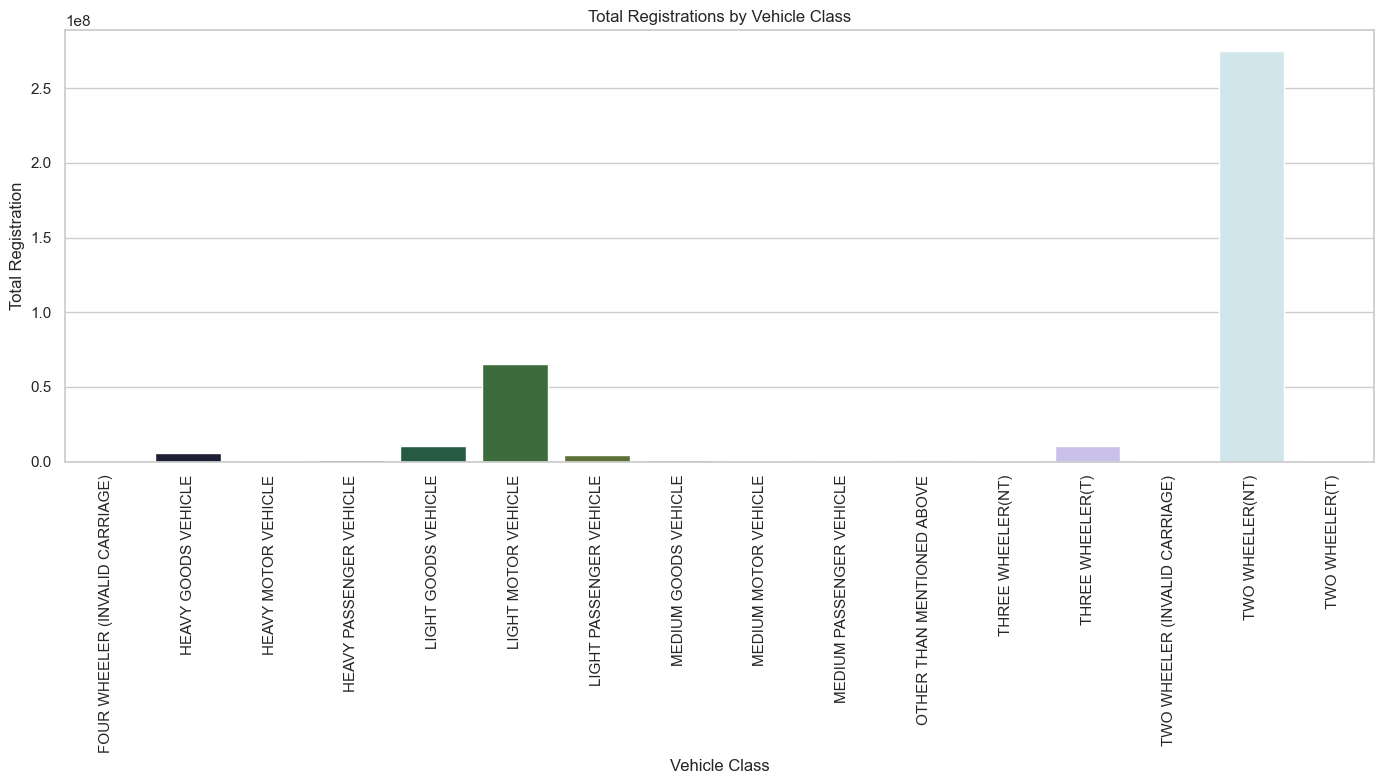

In [13]:
# Vehicle class registration
vehicle_class = pd.read_csv(vehicle_class_path)
vehicle_class['Total Registration'] = vehicle_class['Total Registration'].str.replace(',', '').astype(int)

print(vehicle_class.info())
display(vehicle_class.head())
print(vehicle_class.isnull().sum())

plt.figure(figsize=(14, 8))
sns.barplot(x=vehicle_class['Vehicle Class'], y=vehicle_class['Total Registration'], palette='cubehelix')
plt.xticks(rotation=90)
plt.title('Total Registrations by Vehicle Class')
plt.ylabel('Total Registration')
plt.xlabel('Vehicle Class')
plt.show()